Dec 9, 2021

Jason Cardinal Exercise Notebook Lighthouse Labs - Value Transformation

[https://data.compass.lighthouselabs.ca/days/w03d3/activities/461]

this notebook contains the code along notes

## Value Transformation

The value transformation in machine learning is another part of data preparation, consisting of transforming data into the right or more useful format for modeling and making predictions.

### Why do We Care?

In Machine Learning, we need data in a numeric format for modeling. Furthermore, some of the algorithms work best with normally distributed data. Therefore, during the data preparation phase, we need to apply various transformations to improve our data quality and maximize the quality of the results. For this, we have again a couple of options, depending on the type of variable we are dealing with:

* Basic transformations (logarithmic, exponential, quadratic)
* Binning
* Scaling
* Dummy variables

### Basic Transformations

We can see an example of a logarithmic transformation in the charts below, which are showing the relationship between the size of a brain and the size of a body for animals.

https://i.imgur.com/eGKvRlX.png

We can see that the relationship between these two variables is much clearer when a logarithmic transformation is applied.

We can always test more of these transformations (logarithmic, exponential, quadratic) and combine them with the hypothesis tests or scatter plots to see what gives us the best "normality" or relationship.

### Binning

https://youtu.be/iv_ec0EfXcE

This process is very important for a couple of use cases:

* Decision trees (mentioned in the video)
* The interpretability of regression algorithms - we will learn more about it the next week.

### Scaling

The scaling process is also very important for a couple of additional use cases:

* Interpretability of regression algorithms (we will learn more about it next week).
* Unsupervised learning (more on it tomorrow :))

https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

### Dummy Variables

https://stattrek.com/statistics/dictionary.aspx?definition=dummy-variable

The process of creating dummy variables refers to the transformation of categorical variables into variables with 0s and 1s only.

https://i.imgur.com/4PlFQOm.png

We can see the example in the table above, we have created two yellow variables from the variable Gender.

Do we need both variables Var_Male and Var_Female?

## Value Transformation - Walkthrough


Time to return to our House Price Prediction Project. In this part, we will see how to transform some variables into a format that is more suitable for modeling.

### Prediction of House Prices: Variable Transformation

We can continue in the same notebook as in the activityNull Value Replacement.

Since we are going to apply different transformations to different data types, we start by extracting the numeric feature names:

In [7]:
# import the correct packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# load the dataframe
df_train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()

### Numeric Variables

Now, we will transform the features that are skewed. For example 1stFlrSF:

C:\Users\jason\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>

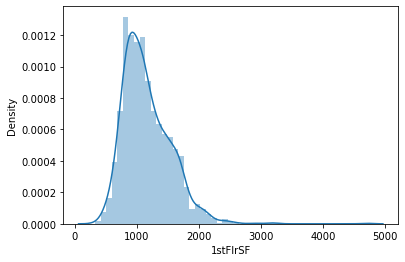

In [10]:
sns.distplot(df_train["1stFlrSF"])

We will apply the logarithmic transformation:

C:\Users\jason\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1stFlrSF_log', ylabel='Density'>

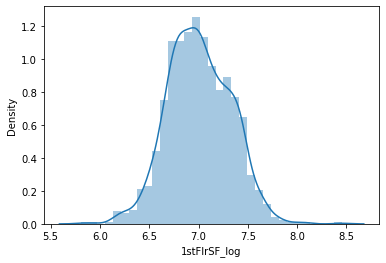

In [11]:
# log transformation
df_train["1stFlrSF_log"] = df_train["1stFlrSF"].apply(np.log)
sns.distplot(df_train["1stFlrSF_log"])

We can see in the graph above that the logarithmic transformation of the variable is more** normal.

Furthermore, we will look at scaling. In sklearn there are plenty of different options. We will use the StandardScaler. Scaling is important for some algorithms that require to have values with the same scale, for example between 0 and 1.

* KMeans (more tomorrow)
* PCA (more next week)
* Linear Regression (more next week).

In [12]:
# Scaling
from sklearn.preprocessing import StandardScaler
#
scaler = StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train[num_feats+["1stFlrSF_log"]].astype(float)))

fit_transform returns data typenumpy.array so once we convert results back to Pandas DataFrame there won't be any original column names. We need to add column names using DataFrame attribute .columns.

In [13]:
print(df_train_scaled.columns)

RangeIndex(start=0, stop=39, step=1)


Assign original column names to the DataFrame df_train_scaled.

In [14]:
df_train_scaled.columns = num_feats+["1stFlrSF_log"]
print(df_train_scaled.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', '1stFlrSF_log'],
      dtype='object')


### String Variables

We know two types of string variables:

* Categorical (Nominal)
* Ordinal

The difference is that with an ordinal variable, we can order the categories by importance/value/score. For example marks at school. Even though it is a string variable with "categories" A, B,..., F, we can order them A>B>C>D>E>F.

Therefore, we can transform the ordinal variables into numbers and create numeric variables out of them. We will use the help of our documentation to understand the sorting.

In [15]:
# lets map ORDINAL features
df_train = df_train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                             "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                             "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                               "ALQ" : 5, "GLQ" : 6},
                             "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                               "ALQ" : 5, "GLQ" : 6},
                             "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                             "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                             "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                             "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5,
                                             "Min2" : 6, "Min1" : 7, "Typ" : 8},
                             "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                             "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                             "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                             "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                             "Street" : {"Grvl" : 1, "Pave" : 2},
                             "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                            )

For categorical features, our options are quite limited. By far the most often used transformation is the creation of Dummy variables.

In [16]:
cat_feats = df_train.dtypes[df_train.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(df_train[cat_feats])

We will create a new Pandas data-frame with dummy variables only. Later on, we will merge this back together to numeric attributes.

In [18]:
df_dummy.head(5)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


### Feature Creation

#### Combination of the Existing Features

We can start with a simple addition. We have two variables 1stFlrSF and 2ndFlrSF but we don't have the total square footage.

We can create a new feature which represents the sum of these two:

<AxesSubplot:xlabel='1stFlr_2ndFlr_SF', ylabel='SalePrice'>

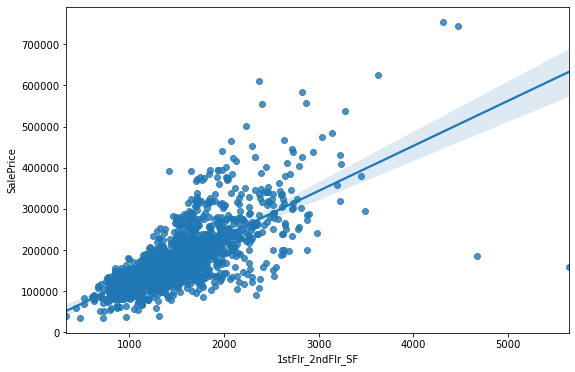

In [19]:
df_train['1stFlr_2ndFlr_SF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']


f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(df_train['1stFlr_2ndFlr_SF']), y=df_train['SalePrice'], data=df_train, order=1)

We can see that there is a significant relationship between the new variable and our target.

Another possibility is OverallGrade.

In [21]:
# overall quality of a house
df_train["OverallGrade"] = df_train["OverallQual"] * df_train["OverallCond"]

#### Simplification of the Existing Features

We are going to work with ordinal features. We have mapped them to numbers in the previous tutorial. Let's check the distribution per category of GarageQual.

(-0.5, 4.5, 0.0, 800000.0)

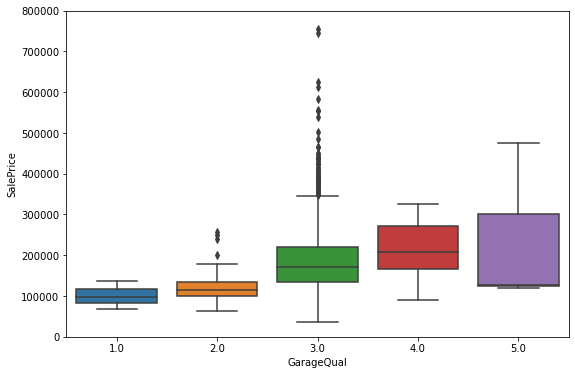

In [22]:
var = 'GarageQual'
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

We can see that there are categories for which the SalePrice is similar. If we move from the category 0 to 1 or 2, there is no change in SalePrice. Therefore, we can merge these categories into one:

In [23]:
df_train["SimplGarageQual"] = df_train.GarageQual.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                           })

Now, let's check again the box plots per category:

(-0.5, 1.5, 0.0, 800000.0)

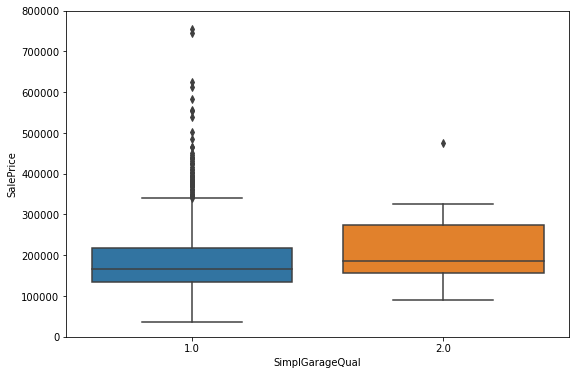

In [24]:
var = 'SimplGarageQual'
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

In [25]:
final_num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()
df_numeric = df_train[final_num_feats]